## CLUSTERING-BASED ANALYSIS OF ACADEMIC PERFORMANCE USING EDUCATION AND LOCATION FEATURES

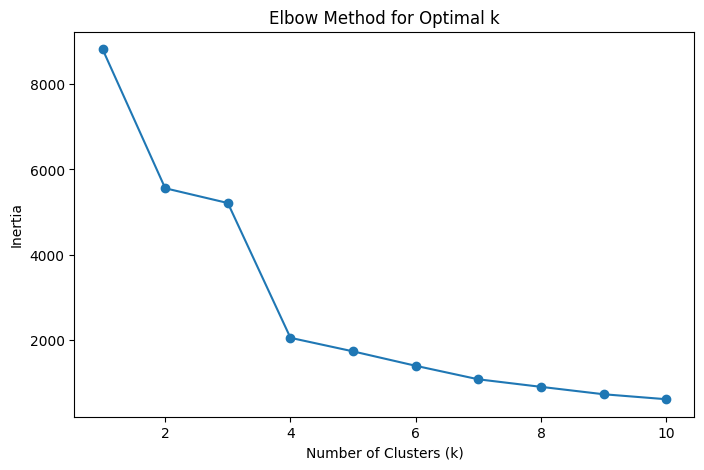

          Postalcode       UserId  CourseModuleState  CourseModuleCompletion  \
Cluster                                                                        
0        5039.024963   999.439060                2.0            1.724075e+09   
1        4960.564782  1026.478210                1.0            1.723359e+09   
2        4908.533191   985.263383                2.0            1.723894e+09   
3        5132.883657   876.210526                1.0            1.723130e+09   

         CourseCompletionStart  CourseCompletionFinish  CourseModuleId  \
Cluster                                                                  
0                 1.724075e+09            1.724075e+09      251.258443   
1                 1.724235e+09            1.724235e+09      264.748528   
2                 1.723894e+09            1.723894e+09      246.702355   
3                 1.723236e+09            1.723236e+09      209.434903   

          Courseid  ModuleGrade  ModuleMaxgrade  Cluster  
Cluster        

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("./data/data.csv")

# Drop rows with NaN values
data = data.dropna()

# Select features for clustering
features = ['Education', 'ModuleGrade', 'ModuleMaxgrade']

# Preprocessing
categorical_features = ['Education']
numerical_features = ['ModuleGrade', 'ModuleMaxgrade']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X = preprocessor.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-means with the optimal number of clusters (choose based on elbow plot)
optimal_k = 4  # Replace with the chosen k from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Analyze clusters: Calculate mean for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
cluster_analysis = data.groupby('Cluster')[numeric_columns].mean()

# Display the cluster analysis
print(cluster_analysis)

# Analyze clusters: Count categorical values
categorical_columns = ['Education']  # Add other categorical columns if needed
for col in categorical_columns:
    print(data.groupby('Cluster')[col].value_counts())


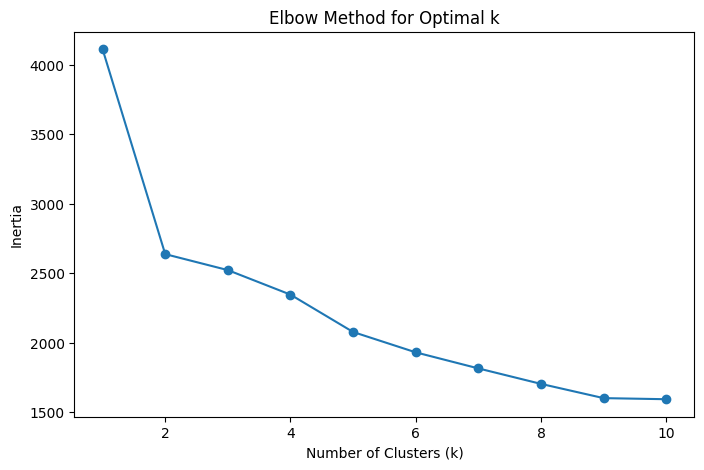

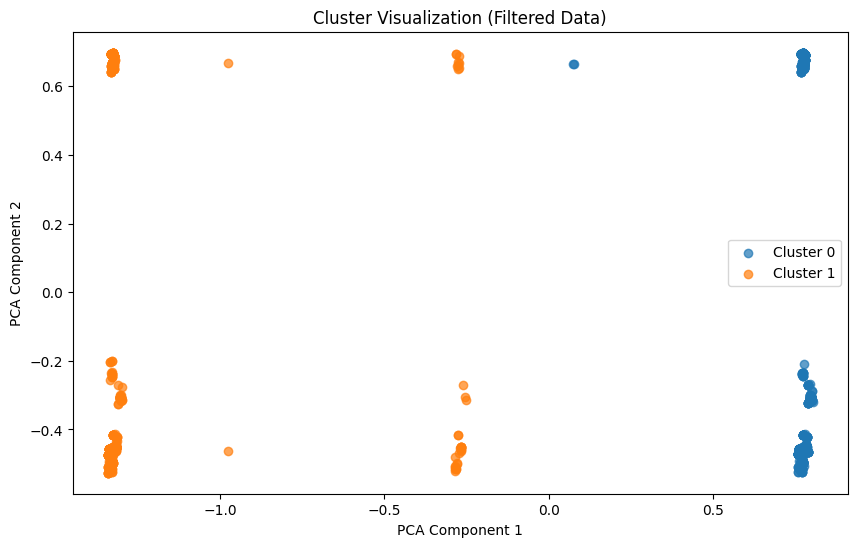

Cluster Analysis:
          GradePercentage
Cluster                 
0              99.992878
1              90.302502

Education Distribution by Cluster:
 Cluster  Education          
0        egyetem                0.400641
         egyetemi szakképzés    0.165598
         szakiskola             0.164530
         gimnázium              0.154915
         technikum              0.097222
         általános              0.017094
1        egyetem                0.397906
         egyetemi szakképzés    0.183246
         szakiskola             0.174520
         gimnázium              0.157068
         technikum              0.061082
         általános              0.026178
Name: proportion, dtype: float64

Location Distribution by Cluster:
 Cluster  Location                   
0        Budapest                       0.123932
         Szeged                         0.050214
         Miskolc                        0.032051
         Szombathely                    0.030983
         Győr        

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("./data/data.csv")

# Drop rows with NaN values
data = data.dropna()

# Calculate grade percentage
data['GradePercentage'] = (data['ModuleGrade'] / data['ModuleMaxgrade']) * 100

# Filter out rows with GradePercentage close to 0 (e.g., <5%)
data = data[data['GradePercentage'] > 5]

# Select features for clustering
features = ['GradePercentage', 'Education', 'Location']

# Preprocessing
categorical_features = ['Education', 'Location']
numerical_features = ['GradePercentage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X = preprocessor.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-means with optimal k (e.g., k=3 based on the Elbow Curve)
optimal_k = 2  # Replace this with your chosen k from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = X_pca[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization (Filtered Data)')
plt.legend()
plt.show()

# Analyze clusters: Group by cluster and compute averages for meaningful features
analysis = data.groupby('Cluster')[['GradePercentage']].mean()
print("Cluster Analysis:\n", analysis)

# Analyze categorical patterns
education_analysis = data.groupby('Cluster')['Education'].value_counts(normalize=True)
location_analysis = data.groupby('Cluster')['Location'].value_counts(normalize=True)

print("\nEducation Distribution by Cluster:\n", education_analysis)
print("\nLocation Distribution by Cluster:\n", location_analysis)
